In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
flights = pd.read_csv('flights.csv')
covid = pd.read_csv('us-counties.csv')



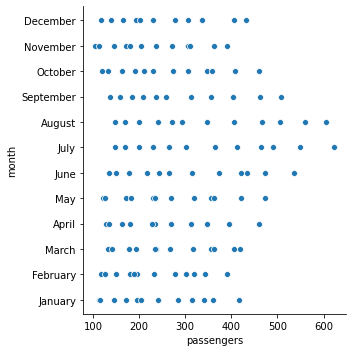

In [4]:
sbn.relplot(x='passengers', y = 'month', data = df)

In [2]:
covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
340757,2020-07-16,Sweetwater,Wyoming,56037.0,158,2
340758,2020-07-16,Teton,Wyoming,56039.0,181,1
340759,2020-07-16,Uinta,Wyoming,56041.0,217,0
340760,2020-07-16,Washakie,Wyoming,56043.0,42,5


In [3]:
#cases for texas counties only
texas = covid.loc[covid['state'] == 'Texas']
texas
#texas = texas.sort_values('cases', ascending = False)
#texas.loc[hawaii['date'] == "2020-07-16"]

,date,county,state,fips,cases,deaths
143,2020-02-12,Bexar,Texas,48029.0,1,0
154,2020-02-13,Bexar,Texas,48029.0,2,0
165,2020-02-14,Bexar,Texas,48029.0,2,0
176,2020-02-15,Bexar,Texas,48029.0,2,0
187,2020-02-16,Bexar,Texas,48029.0,2,0
...,...,...,...,...,...,...
340391,2020-07-16,Wood,Texas,48499.0,163,5
340392,2020-07-16,Yoakum,Texas,48501.0,45,0
340393,2020-07-16,Young,Texas,48503.0,68,1
340394,2020-07-16,Zapata,Texas,48505.0,112,1


In [4]:
#cases only for denton county
denton = texas.loc[texas['county']=='Denton']
denton

#denton.sort_values('index', ascending = False)

,date,county,state,fips,cases,deaths
2673,2020-03-15,Denton,Texas,48121.0,1,0
3141,2020-03-16,Denton,Texas,48121.0,1,0
3675,2020-03-17,Denton,Texas,48121.0,1,0
4298,2020-03-18,Denton,Texas,48121.0,5,0
5052,2020-03-19,Denton,Texas,48121.0,9,0
...,...,...,...,...,...,...
327447,2020-07-12,Denton,Texas,48121.0,4049,40
330631,2020-07-13,Denton,Texas,48121.0,4162,40
333820,2020-07-14,Denton,Texas,48121.0,4316,41
337013,2020-07-15,Denton,Texas,48121.0,4467,41


In [5]:
#county in texas with the most cases
texas.sort_values('cases', ascending = False).head(1)

,date,county,state,fips,cases,deaths
340246,2020-07-16,Harris,Texas,48201.0,51969,509


In [6]:
#county with most cases in the country
covid.loc[covid['date'] == "2020-07-16"].sort_values('cases', ascending = False).head(10)

,date,county,state,fips,cases,deaths
339405,2020-07-16,New York City,New York,NaN,225045,22842
337771,2020-07-16,Los Angeles,California,6037.0,147468,3988
338176,2020-07-16,Cook,Illinois,17031.0,97214,4750
337669,2020-07-16,Maricopa,Arizona,4013.0,88954,1311
337928,2020-07-16,Miami-Dade,Florida,12086.0,75424,1246
340246,2020-07-16,Harris,Texas,48201.0,51969,509
339404,2020-07-16,Nassau,New York,36059.0,42506,2704
339424,2020-07-16,Suffolk,New York,36103.0,42333,2039
340202,2020-07-16,Dallas,Texas,48113.0,37996,501
337891,2020-07-16,Broward,Florida,12011.0,35566,464


<AxesSubplot:xlabel='date', ylabel='cases'>

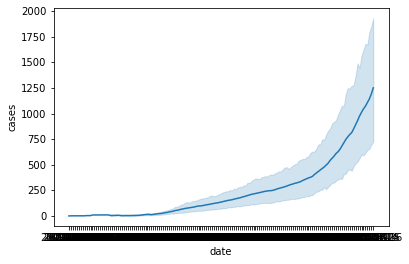

In [7]:
sbn.lineplot(x = 'date', y = 'cases', data = texas)

In [8]:
#gets avg number of cases per county in texas on a given date
date = "2020-07-14"
state_mean = texas.groupby('date').sum()
state_mean
state_mean.loc[date]

fips      12015049.0
cases       284638.0
deaths        3449.0
Name: 2020-07-14, dtype: float64

In [9]:
print(list(set(covid["state"])))

['West Virginia', 'New Jersey', 'Maryland', 'Texas', 'Vermont', 'Oklahoma', 'Indiana', 'Virginia', 'North Dakota', 'Iowa', 'Alabama', 'Nevada', 'Utah', 'Nebraska', 'Montana', 'Colorado', 'Virgin Islands', 'California', 'Georgia', 'District of Columbia', 'South Carolina', 'Kansas', 'Delaware', 'Mississippi', 'Kentucky', 'South Dakota', 'Guam', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Hawaii', 'Arkansas', 'Puerto Rico', 'Missouri', 'Idaho', 'Alaska', 'Minnesota', 'New Mexico', 'Tennessee', 'Louisiana', 'New York', 'Illinois', 'Massachusetts', 'Wisconsin', 'Arizona', 'Michigan', 'New Hampshire', 'Wyoming', 'Connecticut', 'Maine', 'Ohio', 'Northern Mariana Islands', 'Florida', 'North Carolina', 'Washington']


Vhat staat u vant?New York


<AxesSubplot:xlabel='date', ylabel='cases'>

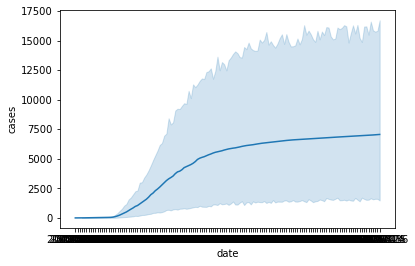

In [10]:
inp = input("Vhat staat u vant?")
def stateCasesGraph(state):
    state_df = covid.loc[covid['state']==state]
    state_cases = state_df.reset_index()
    
    return sbn.lineplot(x=state_df['date'], y=state_df['cases'], data = state_df)
stateCasesGraph(inp)
#state_df = covid.loc[covid['state']=='Texas']
#state_df = state_df.reset_index()
#state_df
#sbn.lineplot(x=state_df['date'], y=state_df['cases'], data = state_df)

Enter a state to see the graph of its total number cases> Texas
               index        fips   cases  deaths
date                                            
2020-02-12       143     48029.0       1       0
2020-02-13       154     48029.0       2       0
2020-02-14       165     48029.0       2       0
2020-02-15       176     48029.0       2       0
2020-02-16       187     48029.0       2       0
...              ...         ...     ...     ...
2020-07-12  80894970  11918475.0  264811    3246
2020-07-13  81681418  11918475.0  273732    3313
2020-07-14  83137116  12015049.0  284638    3449
2020-07-15  83932173  12015049.0  296478    3590
2020-07-16  84727479  12015049.0  311516    3744

[156 rows x 4 columns]


<AxesSubplot:xlabel='date', ylabel='cases'>

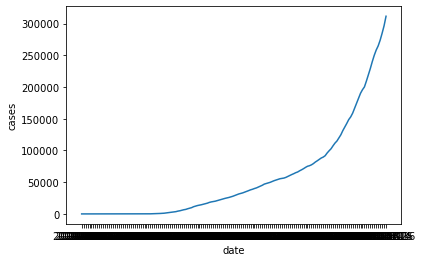

In [67]:
#function to see graph of total num of cases for state
inp = input("Enter a state to see the graph of its total number cases> ")
def totalCasesGraph(state = None):
    
    state_df = covid.loc[covid['state']==state]
    state_df = state_df.reset_index()
    state_df = state_df.groupby('date').sum()
    print(state_df)
    return sbn.lineplot(x = state_df.index, y = state_df['cases'], data = state_df)
                        
                
totalCasesGraph(state = inp)

In [75]:

texas_agreg = state_df.groupby('date').sum()
texas_agreg
#for index, row in texas.iterrows():
#    print(index, row[])
texas_agreg['growth'] = texass_agreg[cases] - texas_agreg.loc[]

,index,fips,cases,deaths
date,,,,
2020-02-12,143,48029.0,1,0
2020-02-13,154,48029.0,2,0
2020-02-14,165,48029.0,2,0
2020-02-15,176,48029.0,2,0
2020-02-16,187,48029.0,2,0
...,...,...,...,...
2020-07-12,80894970,11918475.0,264811,3246
2020-07-13,81681418,11918475.0,273732,3313
2020-07-14,83137116,12015049.0,284638,3449


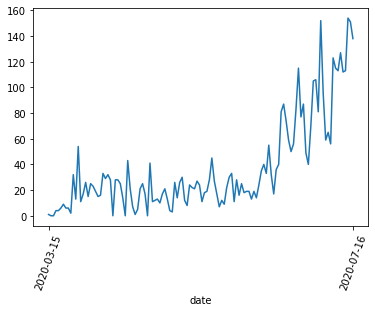

In [158]:
#denton.iloc[0]
growth = [1]

denton['date'].count()
for index, row in denton.iterrows():
    if index != 0:
        diff = denton.loc[index]['cases'] - denton.loc[index-1]['cases']
        growth.append(diff)
        


sbn.lineplot(x=denton['date'], y=growth)
plt.xticks([denton['date'][0], denton['date'][123]], rotation = 70)
plt.rcParams["xtick.labelsize"] = 10

Enter state name to get its daily cases graphTexas


,date,fips,cases,deaths
0,2020-02-12,48029.0,1,0
1,2020-02-13,48029.0,2,0
2,2020-02-14,48029.0,2,0
3,2020-02-15,48029.0,2,0
4,2020-02-16,48029.0,2,0
...,...,...,...,...
151,2020-07-12,11918475.0,264811,3246
152,2020-07-13,11918475.0,273732,3313
153,2020-07-14,12015049.0,284638,3449
154,2020-07-15,12015049.0,296478,3590


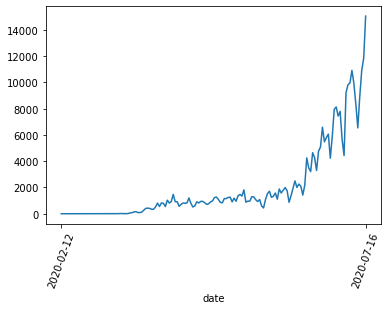

In [188]:
#daily cases graph for any state
inp = input('Enter state name to get its daily cases graph')
state_df = covid.loc[covid['state']==inp]

state_df = state_df.groupby('date').sum()
state_df = state_df.reset_index()
growth = [1]

df_len = state_df['date'].count()
for index, row in state_df.iterrows():
    if index != 0:
        diff = state_df.loc[index]['cases'] - state_df.loc[index-1]['cases']
        growth.append(diff)
        


sbn.lineplot(x=state_df['date'], y=growth)
plt.xticks([state_df['date'][0], state_df['date'][df_len-1]], rotation = 70)
plt.rcParams["xtick.labelsize"] = 10
state_df

In [181]:
covid.groupby('state').sum().sort_values('cases', ascending = False)

,fips,cases,deaths
state,,,
New York,2.494099e+08,35766565,2717137
New Jersey,8.974716e+07,14589890,1047729
California,4.277296e+07,13111411,394511
Illinois,1.864606e+08,10117231,470456
Texas,1.188702e+09,8849292,162837
Massachusetts,4.505081e+07,8532481,575082
Florida,9.615826e+07,8473995,233463
Pennsylvania,3.288377e+08,6914038,463194
Michigan,2.385644e+08,5600054,489281


In [182]:
covid['country'] = 'US'


,date,county,state,fips,cases,deaths,country
0,2020-01-21,Snohomish,Washington,53061.0,1,0,US
1,2020-01-22,Snohomish,Washington,53061.0,1,0,US
2,2020-01-23,Snohomish,Washington,53061.0,1,0,US
3,2020-01-24,Cook,Illinois,17031.0,1,0,US
4,2020-01-24,Snohomish,Washington,53061.0,1,0,US
...,...,...,...,...,...,...,...
340757,2020-07-16,Sweetwater,Wyoming,56037.0,158,2,US
340758,2020-07-16,Teton,Wyoming,56039.0,181,1,US
340759,2020-07-16,Uinta,Wyoming,56041.0,217,0,US
340760,2020-07-16,Washakie,Wyoming,56043.0,42,5,US


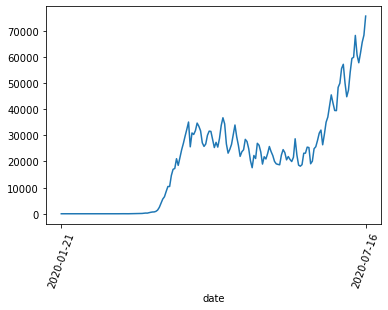

In [200]:
#covid.groupby('country').sum()
data_agreg = covid.groupby('date').sum()
data_agreg.reset_index(inplace = True)
growth = [1]

df_len = data_agreg['date'].count()
for index, row in data_agreg.iterrows():
    if index != 0:
        diff = data_agreg.loc[index]['cases'] - data_agreg.loc[index-1]['cases']
        growth.append(diff)
        


sbn.lineplot(x=data_agreg['date'], y=growth)
plt.xticks([data_agreg['date'][0], data_agreg['date'][df_len-1]], rotation = 70)
plt.rcParams["xtick.labelsize"] = 10